<a href="https://colab.research.google.com/github/hirofsgit/Python_1/blob/main/Chap11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7cd04b3a8daf412dc87e42f87cabce0ddc92abbbb3babe344ef7ffac55516821
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats, linalg
import copy
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.stats import poisson
from scipy.stats import norm

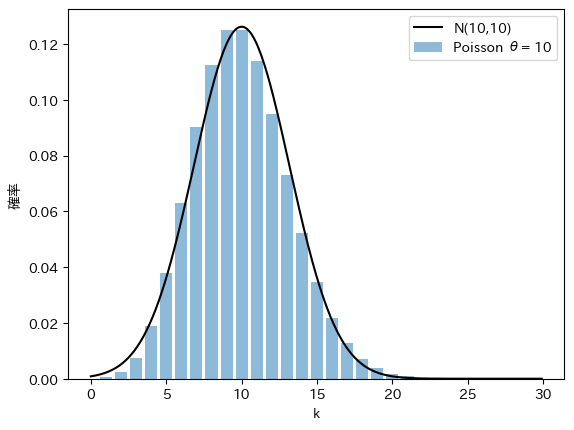

In [ ]:
x =  np.arange(1, 30, 1)
#ポアソン分布における確率
y10= [poisson.pmf(i, 10) for i in x]

X = np.arange(0, 30, 0.1)

#pdfは確率密度関数
#平均:10, 標準偏差:√10
Y = norm.pdf(X, 10, np.sqrt(10))


#ここからグラフの描画
fig, ax = plt.subplots(facecolor="w")
plt.bar(x,y10,alpha=0.5, label="Poisson θ= %d" % 10)
plt.plot(X, Y,label="N(10,10)",c='black')

plt.legend()
plt.xlabel("k")
plt.ylabel('確率')
plt.show()

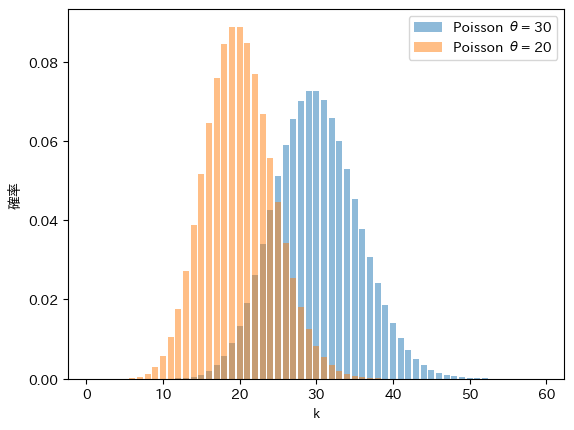

In [ ]:
x =  np.arange(1, 60, 1)
#ポアソン分布における確率
y10= [poisson.pmf(i, 30) for i in x]
Y = [poisson.pmf(i, 20) for i in x]

#ここからグラフの描画
fig, ax = plt.subplots(facecolor="w")
plt.bar(x,y10,alpha=0.5, label="Poisson θ= %d" % 30)
plt.bar(x, Y, alpha=0.5, label="Poisson θ= %d" % 20)

plt.legend()
plt.xlabel("k")
plt.ylabel('確率')
plt.show()

(-10.0, 10.0)

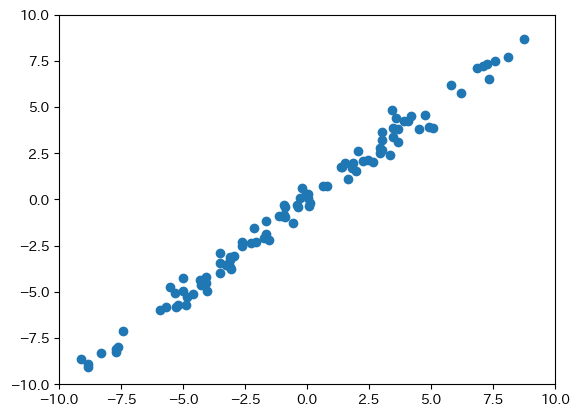

In [ ]:
generator = np.random.default_rng()
x = generator.normal(loc=0, scale=5, size=100)
e = generator.normal(loc=0, scale=0.5, size=100)
y = x + e

plt.scatter(x,y)
plt.xlim(-10,10)
plt.ylim(-10,10)

(-0.5, 0.5)

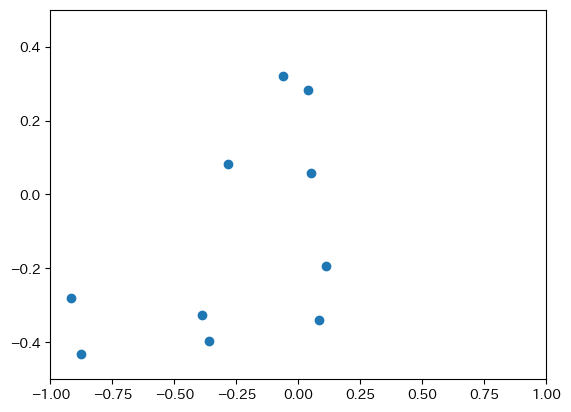

In [ ]:
plt.scatter(x,y)
plt.xlim(-1,1)
plt.ylim(-0.5,0.5)

Chatgpt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def density_function(theta, theta_hat, n):
    integrand = lambda omega: 1 / (np.cosh(omega) - theta * theta_hat)**(n-1)
    integral, _ = quad(integrand, 0, np.inf)

    density = (n-2) * (1-theta**2)**((n-1)/2) * (1-theta_hat**2)**((n-4)/2) / np.pi * integral
    return density

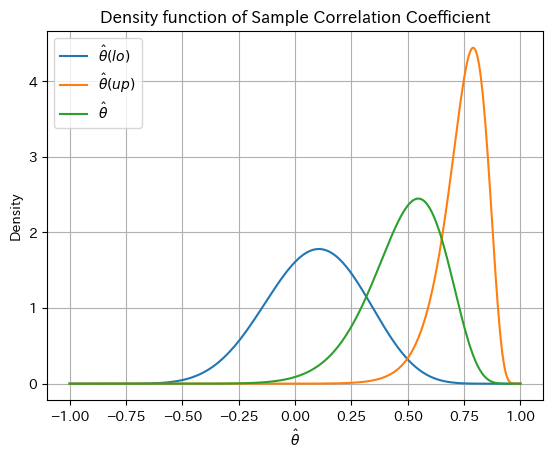

In [ ]:
n = 22  # 任意のサンプルサイズ
theta = 0.093  # 仮定するθ値

theta_hat_values = np.linspace(-1, 1, 400)
density_values = [density_function(theta, theta_hat, n) for theta_hat in theta_hat_values]

plt.plot(theta_hat_values, density_values, label=r'$\hat \theta(lo)$')

n = 22  # 任意のサンプルサイズ
theta = 0.751  # 仮定するθ値

theta_hat_values = np.linspace(-1, 1, 400)
density_values = [density_function(theta, theta_hat, n) for theta_hat in theta_hat_values]

plt.plot(theta_hat_values, density_values, label=r'$\hat \theta(up)$')

n = 22  # 任意のサンプルサイズ
theta = 0.498  # 仮定するθ値

theta_hat_values = np.linspace(-1, 1, 400)
density_values = [density_function(theta, theta_hat, n) for theta_hat in theta_hat_values]

plt.plot(theta_hat_values, density_values, label=r'$\hat \theta$')
plt.xlabel(r'$\hat\theta$')
plt.ylabel('Density')
plt.title('Density function of Sample Correlation Coefficient')
plt.grid(True)
plt.legend()
plt.show()

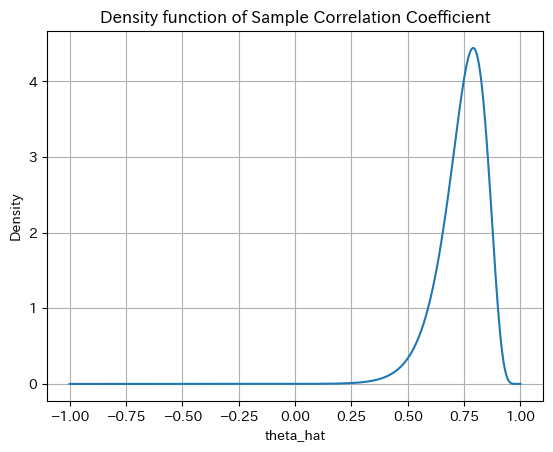

In [ ]:
n = 22  # 任意のサンプルサイズ
theta = 0.751  # 仮定するθ値

theta_hat_values = np.linspace(-1, 1, 400)
density_values = [density_function(theta, theta_hat, n) for theta_hat in theta_hat_values]

plt.plot(theta_hat_values, density_values)
plt.xlabel('theta_hat')
plt.ylabel('Density')
plt.title('Density function of Sample Correlation Coefficient')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import brentq

def density_function(theta_hat, theta, n):
    integrand = lambda omega: 1 / (np.cosh(omega) - theta * theta_hat)**(n-1)
    integral, _ = quad(integrand, 0, np.inf)

    density = (n-2) * (1-theta**2)**((n-1)/2) * (1-theta_hat**2)**((n-4)/2) / np.pi * integral
    return density

def integral_from_neg1_to_bound(bound, theta, n):
    return quad(density_function, -1, bound, args=(theta, n))[0] - 0.025

def integral_from_bound_to_1(bound, theta, n):
    return quad(density_function, bound, 1, args=(theta, n))[0] - 0.025

n = 22  # 任意のサンプルサイズ
theta_hat = 0.093  # 代入するtheta_hatの値

lower_bound = brentq(integral_from_neg1_to_bound, -1, theta_hat, args=(theta_hat, n))
upper_bound = brentq(integral_from_bound_to_1, theta_hat, 1, args=(theta_hat, n))

#print(f"θ(0.025) = {lower_bound}")
print(f"θ(0.975) = {upper_bound}")


θ(0.975) = 0.49794474702341696


In [ ]:
n = 22  # 任意のサンプルサイズ
theta_hat = 0.751  # 代入するtheta_hatの値

lower_bound = brentq(integral_from_neg1_to_bound, -1, theta_hat, args=(theta_hat, n))
upper_bound = brentq(integral_from_bound_to_1, theta_hat, 1, args=(theta_hat, n))

print(f"θ(0.025) = {lower_bound}")
#print(f"θ(0.975) = {upper_bound}")


θ(0.025) = 0.49825770461876834


In [ ]:
import numpy as np

def compute_phi(theta):
    return 0.5 * np.log((1 + theta) / (1 - theta))

# 例として theta = 0.5 を代入して計算
theta_value = 0.093
phi_value = compute_phi(theta_value)

print(f"phi for theta = {theta_value} is: {phi_value}")

phi for theta = 0.093 is: 0.09326951903070095


In [ ]:
theta_value = 0.498
phi_value = compute_phi(theta_value)

print(f"phi for theta = {theta_value} is: {phi_value}")

phi for theta = 0.498 is: 0.5466430221927178


In [ ]:
theta_value = 0.751
phi_value = compute_phi(theta_value)

print(f"phi for theta = {theta_value} is: {phi_value}")

phi for theta = 0.751 is: 0.9752447179105721


In [ ]:
0.546-1.96*0.229

0.09716000000000002

In [ ]:
0.546+1.96*0.229

0.9948400000000001